current directory

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print(current_directory)

/content


change directory

In [ ]:
import os

# Change the current working directory to the specified path
os.chdir('/content/drive/MyDrive/DATASET/dataset')

# Verify the current working directory
print(os.getcwd())


/content/drive/MyDrive/DATASET/dataset


resize train-fake image resalution 224x224

In [ ]:
import os
from PIL import Image

# Path to the dataset
input_dir = '/content/drive/MyDrive/DATASET/dataset/train/Fake'
output_dir = '/content/drive/MyDrive/NEW DATASET/TRAIN/FAKE'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Resize images
for img_name in os.listdir(input_dir):
    img_path = os.path.join(input_dir, img_name)
    with Image.open(img_path) as img:
        img_resized = img.resize((224, 224))
        img_resized.save(os.path.join(output_dir, img_name))


resize train-Genuine image resalution **224x224**

In [ ]:
import os
from PIL import Image

# Path to the dataset
input_dir = '/content/drive/MyDrive/DATASET/dataset/train/Genuine'
output_dir = '/content/drive/MyDrive/NEW DATASET/TRAIN/GENUINE'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Resize images
for img_name in os.listdir(input_dir):
    img_path = os.path.join(input_dir, img_name)
    with Image.open(img_path) as img:
        img_resized = img.resize((224, 224))
        img_resized.save(os.path.join(output_dir, img_name))


resize test-Fake image resalution 224x224

In [ ]:
import os
from PIL import Image

# Path to the dataset
input_dir = '/content/drive/MyDrive/DATASET/dataset/test/Fake'
output_dir = '/content/drive/MyDrive/NEW DATASET/TEST/FAKE'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Resize images
for img_name in os.listdir(input_dir):
    img_path = os.path.join(input_dir, img_name)
    with Image.open(img_path) as img:
        img_resized = img.resize((224, 224))
        img_resized.save(os.path.join(output_dir, img_name))


resize tEST-Genuine image resalution 224x224

In [ ]:
import os
from PIL import Image

# Path to the dataset
input_dir = '/content/drive/MyDrive/DATASET/dataset/test/Genuine'
output_dir = '/content/drive/MyDrive/NEW DATASET/TEST/GENUINE'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Resize images
for img_name in os.listdir(input_dir):
    img_path = os.path.join(input_dir, img_name)
    with Image.open(img_path) as img:
        img_resized = img.resize((224, 224))
        img_resized.save(os.path.join(output_dir, img_name))


visualization

Class Distribution Bar Chart ---Shows the number of images in each class (FAKE and GENUINE) within both the TRAIN and TEST folders.

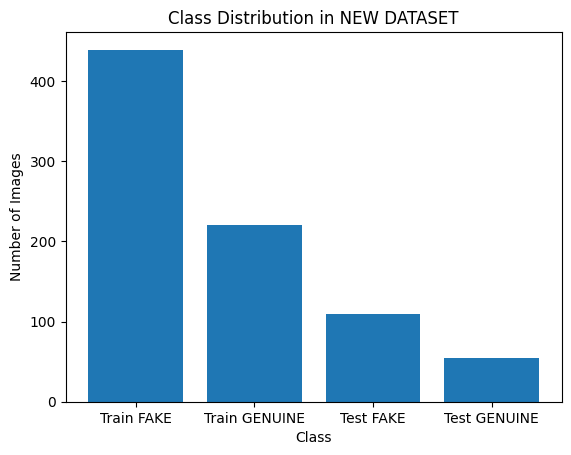

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your dataset organized in folders as described
train_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/TRAIN/FAKE'))
train_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/TRAIN/GENUINE'))
test_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/TEST/FAKE'))
test_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/TEST/GENUINE'))

# Create a bar chart
plt.bar(['Train FAKE', 'Train GENUINE', 'Test FAKE', 'Test GENUINE'],
        [train_fake_count, train_genuine_count, test_fake_count, test_genuine_count])

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in NEW DATASET')
plt.show()

In [ ]:
import os

# Change the current working directory to the specified path
os.chdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET')

# Verify the current working directory
print(os.getcwd())

/content/drive/MyDrive/NEW DATASET/NEW DATASET


TEST Data Augmentation: Generate more genuine images in the training set using techniques like image rotation, cropping, and brightness adjustments.


In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Define the image data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# Load the genuine images from the directory
genuine_images_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/GENUINE'
genuine_images = [os.path.join(genuine_images_dir, file) for file in os.listdir(genuine_images_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Create a directory to store the augmented images
augmented_images_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/GENUINE_AUGMENTED'
os.makedirs(augmented_images_dir, exist_ok=True)

# Generate augmented images from the genuine images
for i, image_path in enumerate(genuine_images):
  # Load the image
  image = tf.keras.utils.load_img(image_path)
  image = tf.keras.utils.img_to_array(image)

  # Augment the image
  augmented_image = datagen.flow(image[np.newaxis, ...], batch_size=1)[0][0]

  # Save the augmented image
  keras.utils.save_img(os.path.join(augmented_images_dir, f"augmented_image_{i}.jpg"), augmented_image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Class Distribution Bar Chart


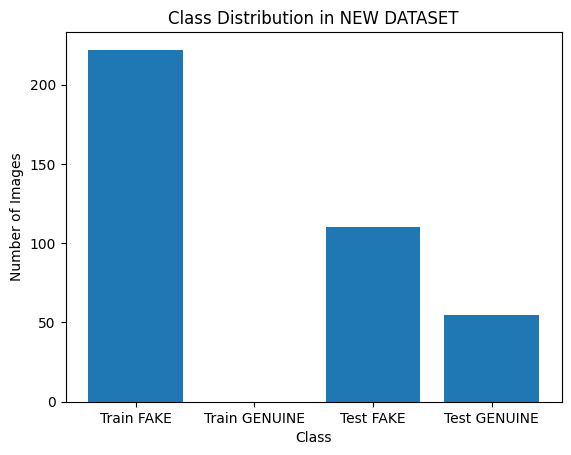

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your dataset organized in folders as described
train_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/FAKE'))
train_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/GENUINE'))
test_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/FAKE'))
test_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/GENUINE'))

# Create a bar chart
plt.bar(['Train FAKE', 'Train GENUINE', 'Test FAKE', 'Test GENUINE'],
        [train_fake_count, train_genuine_count, test_fake_count, test_genuine_count])

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in NEW DATASET')
plt.show()

In [ ]:
import os

# Change the current working directory to the specified path
os.chdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET')

# Verify the current working directory
print(os.getcwd())

/content/drive/MyDrive/NEW DATASET/NEW DATASET


Train Data Augmentation: Generate more genuine images in the training set using techniques like image rotation, cropping, and brightness adjustments. give the code

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Define the image data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# Load the genuine images from the directory
genuine_images_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/GENUINE'
genuine_images = [os.path.join(genuine_images_dir, file) for file in os.listdir(genuine_images_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Create a directory to store the augmented images
augmented_images_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/GENUINE_AUGMENTED'
os.makedirs(augmented_images_dir, exist_ok=True)

# Generate augmented images from the genuine images
for i, image_path in enumerate(genuine_images):
  # Load the image
  image = tf.keras.utils.load_img(image_path)
  image = tf.keras.utils.img_to_array(image)

  # Augment the image
  augmented_image = datagen.flow(image[np.newaxis, ...], batch_size=1)[0][0]

  # Save the augmented image
  keras.utils.save_img(os.path.join(augmented_images_dir, f"augmented_image_{i}.jpg"), augmented_image)

combine train----genuine and genuine_augmented

In [ ]:
import os
import shutil

# Define the directories
genuine_dir = "/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/GENUINE"
augmented_genuine_dir = "/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/GENUINE_AUGMENTED"
combined_dir = "/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/Genuine"

# Create the combined directory if it doesn't exist
if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

# Iterate through the files in the GENUINE directory
for filename in os.listdir(genuine_dir):
    source_path = os.path.join(genuine_dir, filename)
    destination_path = os.path.join(combined_dir, filename)

    # Copy the files to the combined directory
    shutil.copy2(source_path, destination_path)

# Check if augmented_genuine_dir exists before iterating
if os.path.exists(augmented_genuine_dir):
    # Iterate through the files in the AUGMENTED_GENUINE directory
    for filename in os.listdir(augmented_genuine_dir):
        source_path = os.path.join(augmented_genuine_dir, filename)
        destination_path = os.path.join(combined_dir, filename)

        # Copy the files to the combined directory
        shutil.copy2(source_path, destination_path)
else:
    print(f"Warning: Directory not found: {augmented_genuine_dir}")

print("Files combined successfully!")

Files combined successfully!


TEST Data Augmentation: Generate more genuine images in the training set using techniques like image rotation, cropping, and brightness adjustments. give the code

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

# Define the image data generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
)

# Load the genuine images from the directory
genuine_images_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/GENUINE'
genuine_images = [os.path.join(genuine_images_dir, file) for file in os.listdir(genuine_images_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Create a directory to store the augmented images
augmented_images_dir = '/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/GENUINE_AUGMENTED'
os.makedirs(augmented_images_dir, exist_ok=True)

# Generate augmented images from the genuine images
for i, image_path in enumerate(genuine_images):
  # Load the image
  image = tf.keras.utils.load_img(image_path)
  image = tf.keras.utils.img_to_array(image)

  # Augment the image
  augmented_image = datagen.flow(image[np.newaxis, ...], batch_size=1)[0][0]

  # Save the augmented image
  keras.utils.save_img(os.path.join(augmented_images_dir, f"augmented_image_{i}.jpg"), augmented_image)

combine test----genuine and genuine_augmented

In [ ]:
import os
import shutil

# Define the directories
genuine_dir = "/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/GENUINE"
augmented_genuine_dir = "/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/GENUINE_AUGMENTED"
combined_dir = "/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/Genuine"

# Create the combined directory if it doesn't exist
if not os.path.exists(combined_dir):
    os.makedirs(combined_dir)

# Iterate through the files in the GENUINE directory
for filename in os.listdir(genuine_dir):
    source_path = os.path.join(genuine_dir, filename)
    destination_path = os.path.join(combined_dir, filename)

    # Copy the files to the combined directory
    shutil.copy2(source_path, destination_path)

# Check if augmented_genuine_dir exists before iterating
if os.path.exists(augmented_genuine_dir):
    # Iterate through the files in the AUGMENTED_GENUINE directory
    for filename in os.listdir(augmented_genuine_dir):
        source_path = os.path.join(augmented_genuine_dir, filename)
        destination_path = os.path.join(combined_dir, filename)

        # Copy the files to the combined directory
        shutil.copy2(source_path, destination_path)
else:
    print(f"Warning: Directory not found: {augmented_genuine_dir}")

print("Files combined successfully!")

Files combined successfully!


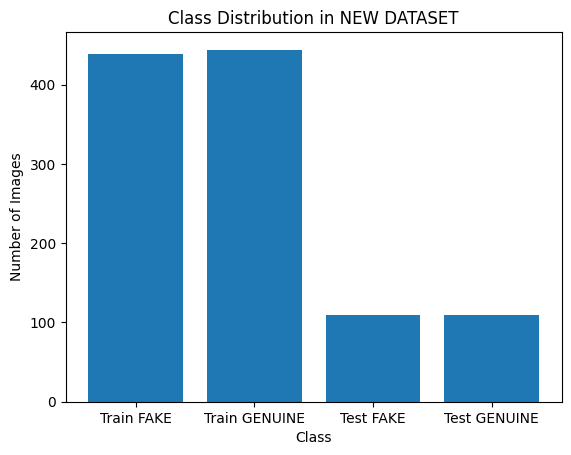

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your dataset organized in folders as described
train_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/FAKE'))
train_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/Genuine'))
test_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/FAKE'))
test_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/Genuine'))

# Create a bar chart
plt.bar(['Train FAKE', 'Train GENUINE', 'Test FAKE', 'Test GENUINE'],
        [train_fake_count, train_genuine_count, test_fake_count, test_genuine_count])

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in NEW DATASET')
plt.show()

In [ ]:
import os

# Change the current working directory to the specified path
os.chdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET')

# Verify the current working directory
print(os.getcwd())

/content/drive/MyDrive/NEW DATASET/NEW DATASET


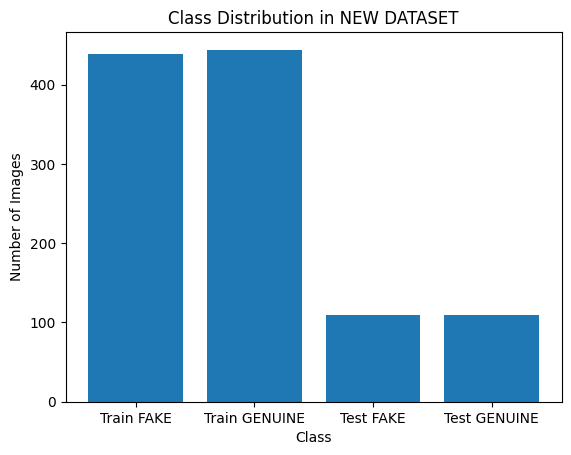

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your dataset organized in folders as described
train_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/FAKE'))
train_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/Genuine'))
test_fake_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/FAKE'))
test_genuine_count = len(os.listdir('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/Genuine'))

# Create a bar chart
plt.bar(['Train FAKE', 'Train GENUINE', 'Test FAKE', 'Test GENUINE'],
        [train_fake_count, train_genuine_count, test_fake_count, test_genuine_count])

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in NEW DATASET')
plt.show()

 Data Distribution Histograms-----Examine the distribution of image features (e.g., pixel values, color histograms, texture properties)

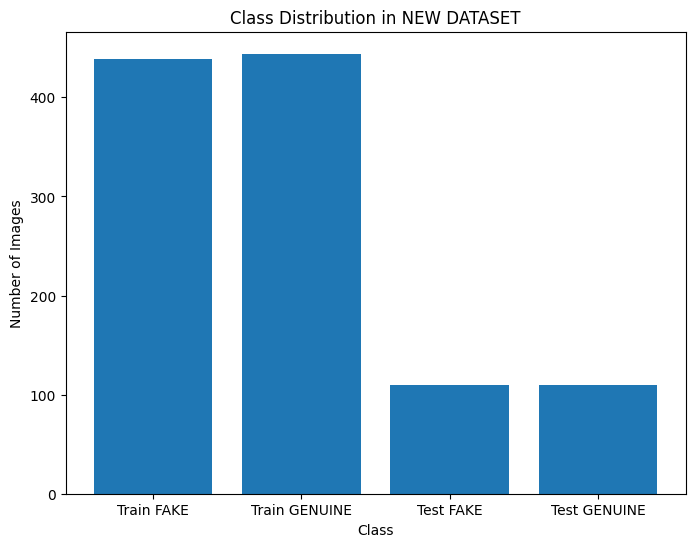

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

def load_and_process_images(path):
    images = []
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Perform any necessary image processing here (e.g., resizing, color conversion)
            images.append(img.ravel())  # Convert image to 1D array
    return np.array(images)

# Load and process images for training sets
train_fake_images = load_and_process_images('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/FAKE')
train_genuine_images = load_and_process_images('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TRAIN/Genuine')
test_fake_images = load_and_process_images('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/FAKE')
test_genuine_images = load_and_process_images('/content/drive/MyDrive/NEW DATASET/NEW DATASET/TEST/Genuine')

# Calculate class distribution
class_distribution = {
    'Train FAKE': len(train_fake_images),
    'Train GENUINE': len(train_genuine_images),
    'Test FAKE': len(test_fake_images),
    'Test GENUINE': len(test_genuine_images)
}

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title('Class Distribution in NEW DATASET')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()